### install 开发环境
参考 [OpenCV-python](https://docs.opencv.org/4.8.0/d5/de5/tutorial_py_setup_in_windows.html)

1. vscode
>1. 从python profile template新建python profile
>2. install jupyter plugin
2. install python
>1. `winget install python3` 安装好后python自动加入到环境变量，重启terminal和vscode即可生效
>2. `pip3 install numpy matplotlib  opencv-contrib-python`

In [1]:
import cv2 as cv
print( cv.__version__)

4.8.0


## usage read/write imgage
OpenCV 以BGR模式加载图像，而 matplotlib以常见的RGB模式显示图像，需要转换。[转换参考](https://blog.csdn.net/qq_37274615/article/details/79893667)

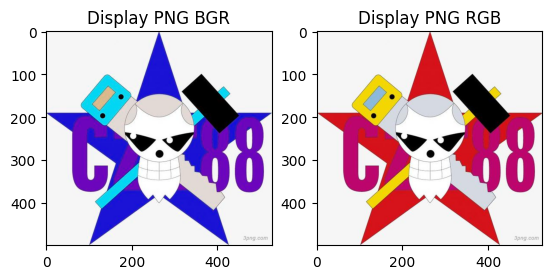

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
img = cv.imread("one_piece.jpeg", flags=cv.IMWRITE_PNG_STRATEGY_FILTERED)
# cv.imshow("Display", img)
#k = cv.waitKey(0)
# if k == ord("q"):
    #exit()
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Display PNG BGR")
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Display PNG RGB")
plt.show()


### video operate
保存的video格式
FourCC is a 4-byte code used to specify the video codec. The list of available codes can be found in fourcc.org. It is platform dependent. The following codecs work fine for me.

In Fedora: DIVX, XVID, MJPG, X264, WMV1, WMV2. (XVID is more preferable. MJPG results in high size video. X264 gives very small size video)
In Windows: DIVX (More to be tested and added)
In OSX: MJPG (.mp4), DIVX (.avi), X264 (.mkv).
FourCC code is passed as `cv.VideoWriter_fourcc('M','J','P','G')or cv.VideoWriter_fourcc(*'MJPG')` for MJPG.

In [5]:
import numpy as np
import cv2 as cv
# or read from a local file
# cap = cv.VideoCapture("video.mp4")
cap = cv.VideoCapture(0)
# Define the codec and create VideoWriter object
fourcc = cv.VideoWriter_fourcc(*'MJPG')
out = cv.VideoWriter('video.mp4', fourcc, 20.0, (640, 480))
if not cap.isOpened():
 print("Cannot open camera")
 exit()
while True:
 # Capture frame-by-frame
 ret, frame = cap.read()
 # if frame is read correctly ret is True
 if not ret:
    print("Can't receive frame (stream end?). Exiting ...")
    break
 out.write(frame)
 # Our operations on the frame come here
 gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
 # Display the resulting frame
 cv.imshow('frame', gray)
 if cv.waitKey(1) == ord('q'):
    break
# When everything done, release the capture
cap.release()
out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


### draw/mouse/tracker operate
OpenCV也可以绘制一些简单的图形，操作鼠标，绘制Color trackbar等等

## image core operation


[246 246 246]
246 246 246
246
100
(500, 527, 3)
790500


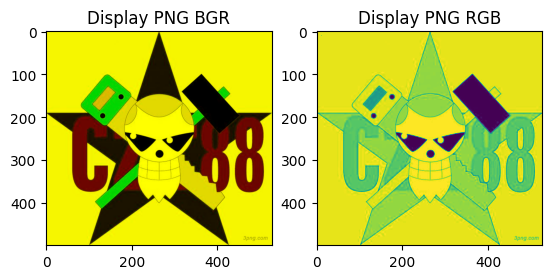

In [25]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('one_piece.jpeg')
# BGR
px = img[100, 100]
print(px)
blue = img[100, 100, 0]
green = img[100, 100, 1]
red = img[100, 100, 2]
print(blue, green, red)

# Numpy is an optimized library for fast array calculations. 
# So simply accessing each and every pixel value and modifying 
# it will be very slow and it is discouraged.
#
# better pixel accessing
# accessing RED value
o_red = img.item(10, 10, 2)
# modifying RED value
print(o_red)
img.itemset((10, 10, 2), 100)
n_red = img.item(10, 10, 2)
print(n_red)

# tuple of number of rows, columns and channels (if the image is color)
# tuple of number of rows, columns (if the image is grayscale)
print(img.shape)
print(img.size)


# image ROI(region of interest)
# a small of region of interes of the original image
# instead of operating or searching the whole image, it imporves accuracy and performance
roi = img[0:0, 200:200]
# plt.imshow(roi)
# plt.show()

# image split is a costly operation
b,g,r = cv.split(img)
img2 = cv.merge((r,g,b))

img[:,:,2] = 0
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Display PNG BGR")
plt.subplot(1, 2, 2)
plt.imshow(img2[:,:,0])
plt.title("Display PNG RGB")
plt.show()


#### Arithetic Operations on Images
https://docs.opencv.org/4.8.0/d6/d00/tutorial_py_root.html
https://docs.opencv.org/4.8.0/d7/d16/tutorial_py_table_of_contents_core.html

https://docs.opencv.org/4.8.0/d0/d86/tutorial_py_image_arithmetics.html

https://docs.opencv.org/4.8.0/index.html
https://www.zhihu.com/question/594668461/answer/3198607061

